# Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import *
from keras import callbacks

np.random.seed(0)

In [2]:
data = pd.read_csv("weather.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations. 

Predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

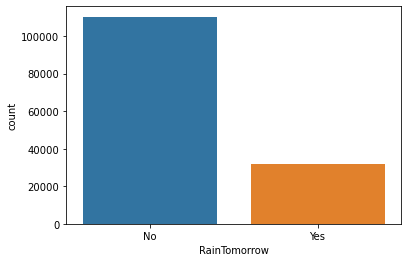

In [71]:
sns.countplot(x= data["RainTomorrow"])

<AxesSubplot:>

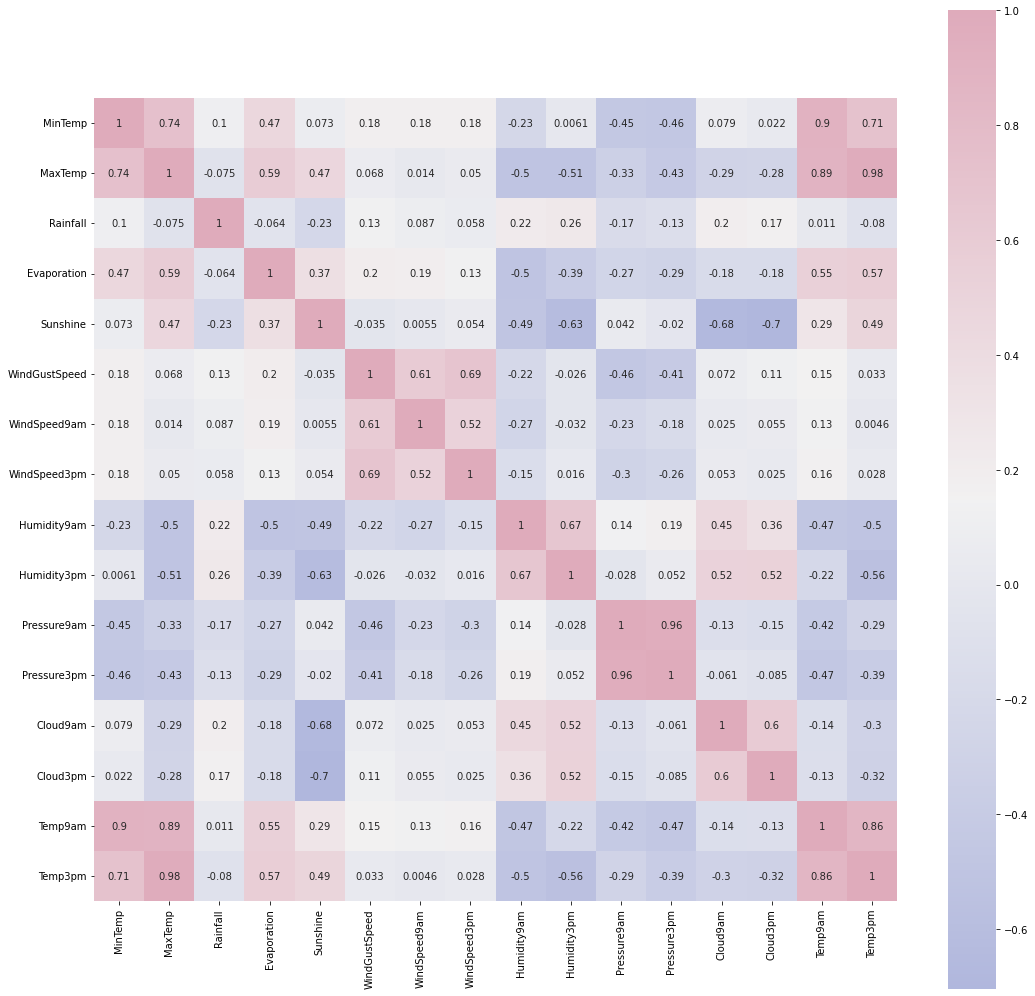

In [72]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [73]:
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [8]:

data['Date']= pd.to_datetime(data["Date"])
data['year'] = data.Date.dt.year

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data['day_of_week'] = data['Date'].dt.dayofweek+1
data = encode(data, 'day_of_week', 7)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,year,month,month_sin,month_cos,day,day_sin,day_cos,day_of_week,day_of_week_sin,day_of_week_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530,1,0.781831,0.623490
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958,2,0.974928,-0.222521
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763,3,0.433884,-0.900969
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967,4,-0.433884,-0.900969
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964,5,-0.974928,-0.222521


Text(0.5, 0, 'Days In Year')

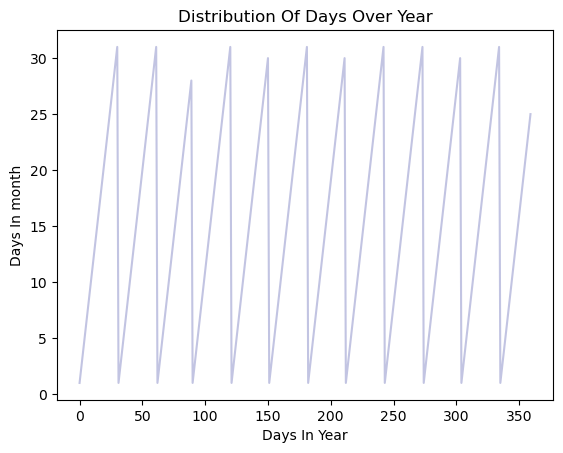

In [9]:
 
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Days In Year')

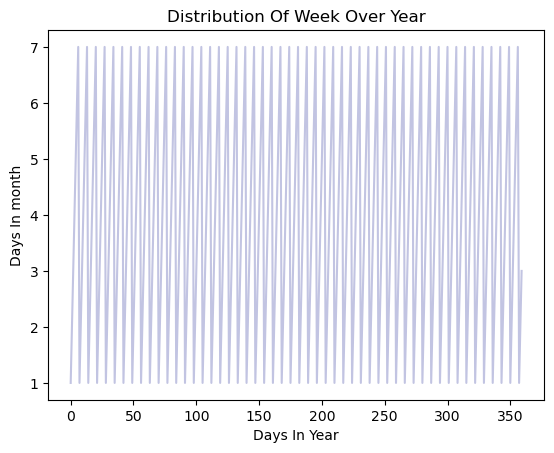

In [10]:
section = data[:360] 
tm = section["day_of_week"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Week Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

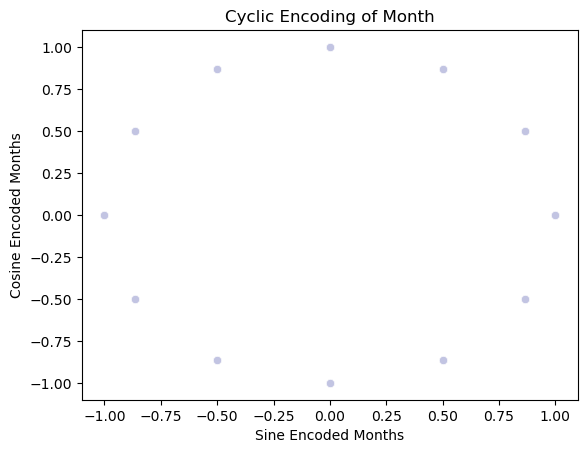

In [11]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")


Text(0.5, 0, 'Sine Encoded Day')

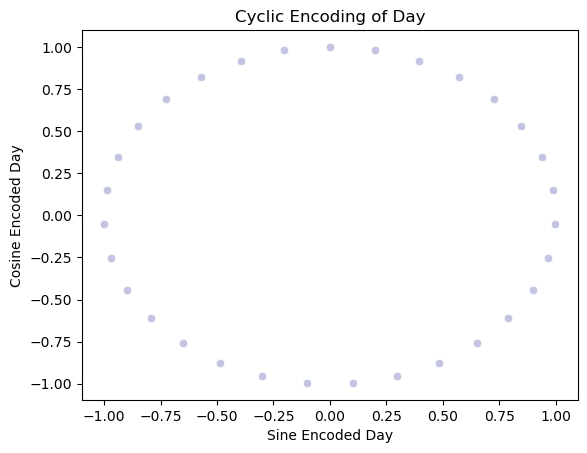

In [12]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

**Categorical variables**

* Filling missing values with mode of the column value

In [13]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [79]:
# Missing values in categorical variables
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [80]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

# Chi-Squared Test of Independence
#### Rain Today vs Rain Tomorrow

In [83]:
data[['RainToday','RainTomorrow']].head()


,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [18]:
import scipy.stats
from scipy.stats import chi2

In [15]:
cont_table = pd.crosstab(data["RainToday"], data["RainTomorrow"])
print(cont_table)

RainTomorrow     No    Yes
RainToday                 
No            92728  16604
Yes           16858  14597


In [16]:
obs_values = cont_table.values 
print(obs_values)

[[92728 16604]
 [16858 14597]]


### Expected Values

In [19]:
b = scipy.stats.chi2_contingency(cont_table)
expected_values = b[3]
print("Expected Values: \n\n", expected_values)

Expected Values: 

 [[85102.00907754 24229.99092246]
 [24483.99092246  6971.00907754]]


In [20]:
no_of_rows = len(cont_table.iloc[0:2, 0])
no_of_columns = len(cont_table.iloc[0, 0:2])
number_of_freedom = (no_of_rows - 1) * (no_of_columns - 1)
print("Degree of freedom:", number_of_freedom)

Degree of freedom: 1


In [21]:
# significance level %5
alpha = 0.05


chi_square = sum([(observed - expected)**2./expected for observed, expected in zip(obs_values, expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("chi-square statistic:", chi_square_statistic)

chi-square statistic: 13801.289359964965


In [22]:
critical_value = chi2.ppf(q = 1-alpha, df = number_of_freedom)
print("critical_value:", critical_value)

critical_value: 3.841458820694124


### P Value

In [23]:

p_value = 1-chi2.cdf(x = chi_square_statistic, df = number_of_freedom)
print("p-value:", p_value)

p-value: 0.0


In [24]:
print("Significance level: ", alpha)
print("Degree of Freedom: ", number_of_freedom)
print("chi-square statistic:", chi_square_statistic)
print("critical_value:", critical_value)
print("p-value:", p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 13801.289359964965
critical_value: 3.841458820694124
p-value: 0.0


###  Hypotesis

In [25]:
if chi_square_statistic >= critical_value:
    print("Reject H0, there is a relationship between categorical variables")
else:
    print("Retain H0, there is no relationship between categorical variables")

Reject H0, there is a relationship between categorical variables


In [26]:
if p_value <= alpha:
    print("Reject H0, there is a relationship between categorical variables")
else:
    print("Retain H0, there is no relationship between categorical variables")

Reject H0, there is a relationship between categorical variables


In [34]:
data['RainToday'] = [ 0 if i == 'No' else  1 for i in data.RainToday]
data['RainTomorrow'] = [ 0 if i == 'No' else  1 for i in data.RainTomorrow]

In [36]:
data[['RainToday','RainTomorrow']].corr()

,RainToday,RainTomorrow
RainToday,1.000000,0.340036
RainTomorrow,0.340036,1.000000


**Numerical variables**

* Filling missing values with median of the column value

In [37]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos']


In [38]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0
day_of_week_sin 0
day_of_week_cos 0


In [39]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   Location         145460 non-null  object        
 2   MinTemp          145460 non-null  float64       
 3   MaxTemp          145460 non-null  float64       
 4   Rainfall         145460 non-null  float64       
 5   Evaporation      145460 non-null  float64       
 6   Sunshine         145460 non-null  float64       
 7   WindGustDir      135134 non-null  object        
 8   WindGustSpeed    145460 non-null  float64       
 9   WindDir9am       134894 non-null  object        
 10  WindDir3pm       141232 non-null  object        
 11  WindSpeed9am     145460 non-null  float64       
 12  WindSpeed3pm     145460 non-null  float64       
 13  Humidity9am      145460 non-null  float64       
 14  Humidity3pm      145

Text(0.5, 0, 'Years')

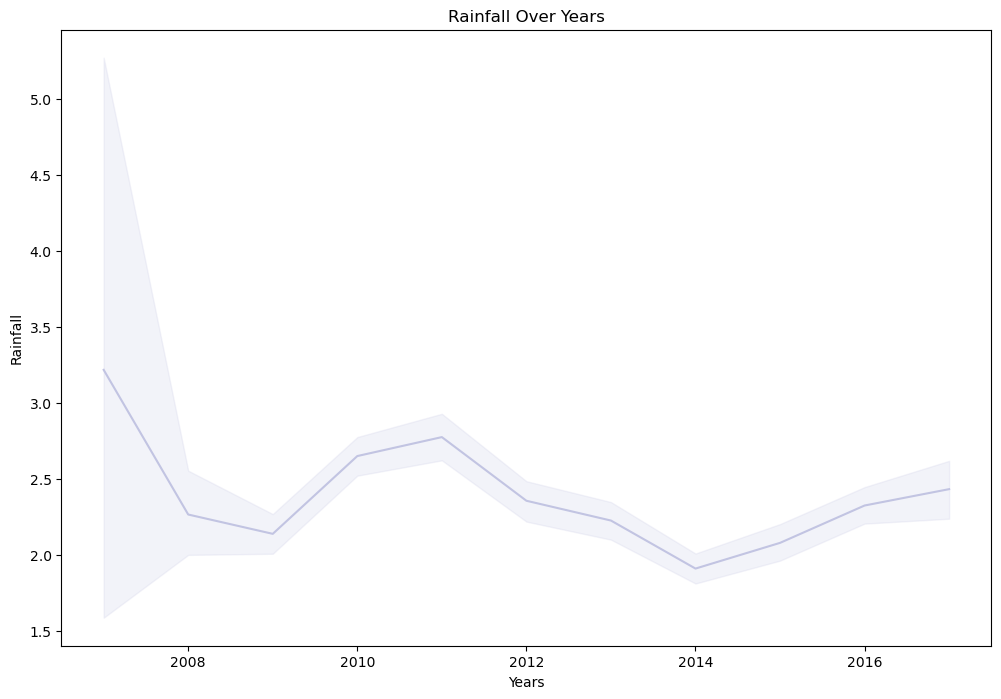

In [41]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

C:\Users\Student\AppData\Local\Temp\ipykernel_1828\932154524.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None)


Text(0.5, 0, 'Year')

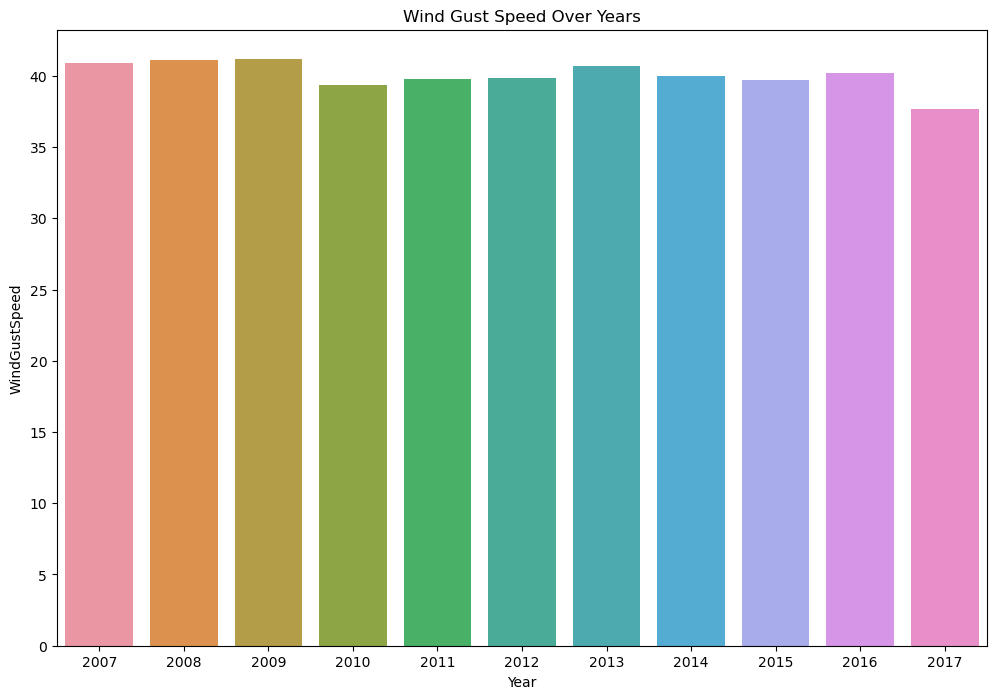

In [43]:

plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

**Label encoding the catagorical varable**

In [44]:
data.drop(['RainToday' ,'day_of_week','Date','day', 'month'], axis=1,inplace=True)

In [46]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [48]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         145460 non-null  int32  
 1   MinTemp          145460 non-null  float64
 2   MaxTemp          145460 non-null  float64
 3   Rainfall         145460 non-null  float64
 4   Evaporation      145460 non-null  float64
 5   Sunshine         145460 non-null  float64
 6   WindGustDir      145460 non-null  int32  
 7   WindGustSpeed    145460 non-null  float64
 8   WindDir9am       145460 non-null  int32  
 9   WindDir3pm       145460 non-null  int32  
 10  WindSpeed9am     145460 non-null  float64
 11  WindSpeed3pm     145460 non-null  float64
 12  Humidity9am      145460 non-null  float64
 13  Humidity3pm      145460 non-null  float64
 14  Pressure9am      145460 non-null  float64
 15  Pressure3pm      145460 non-null  float64
 16  Cloud9am         145460 non-null  floa

In [50]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.670768,-0.866215,0.139476,0.944029,1.547444
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,4.064152e-17,1.000003,-1.614034,-1.004491,0.011413,0.824137,1.636860
WindDir3pm,145460.0,-7.503050e-17,1.000003,-1.688306,-0.844398,-0.000489,0.843420,1.687329


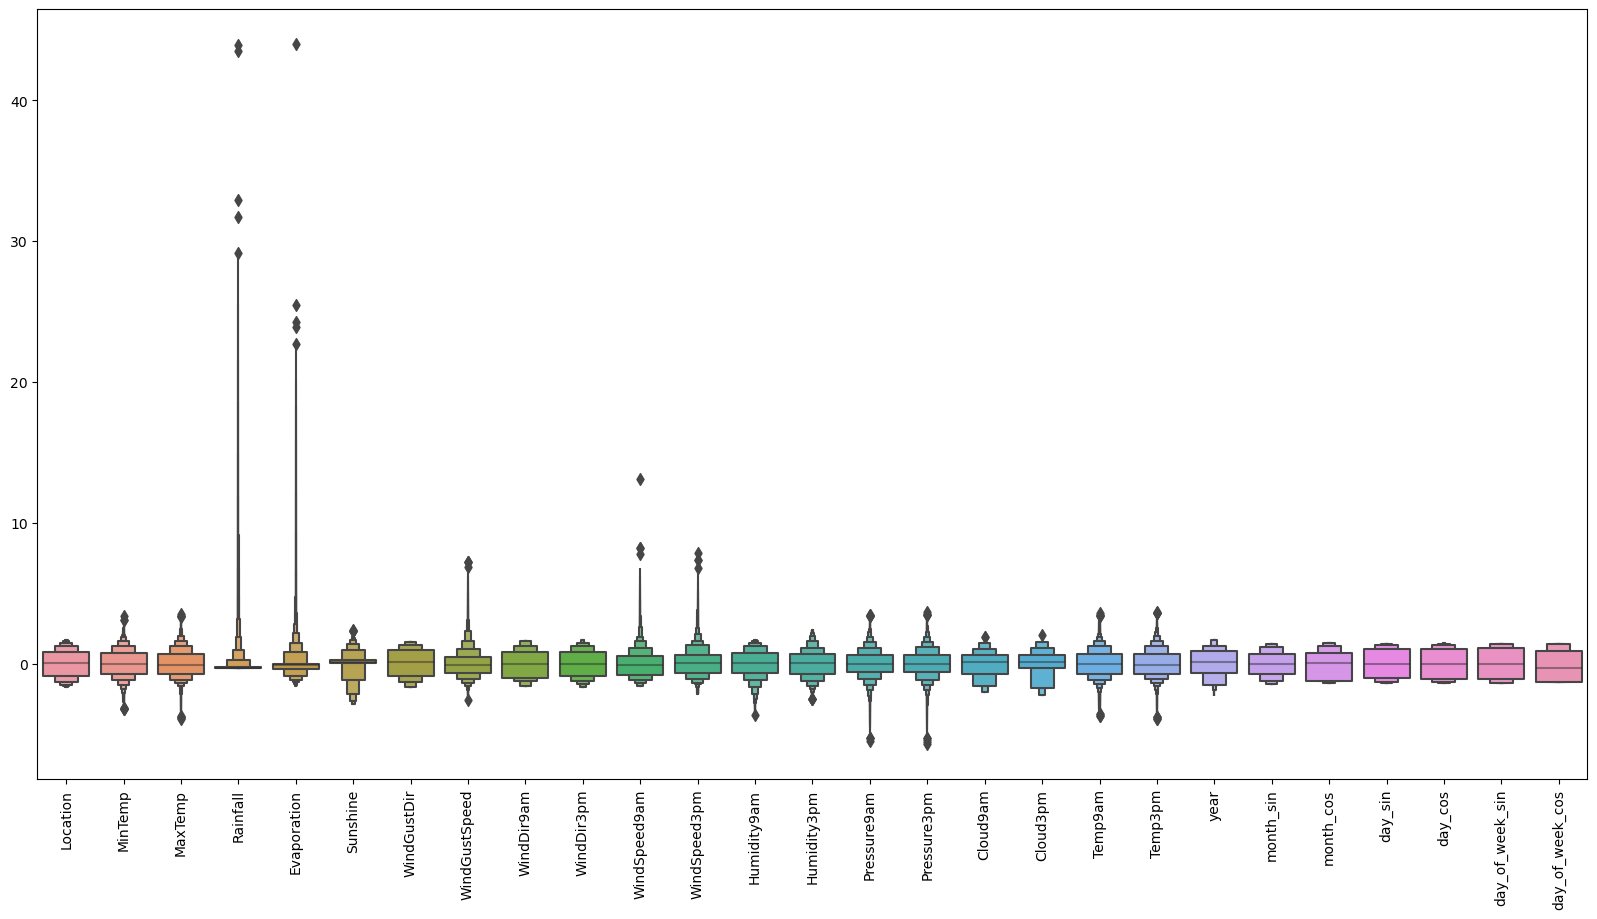

In [51]:
#Detecting outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [52]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 28)

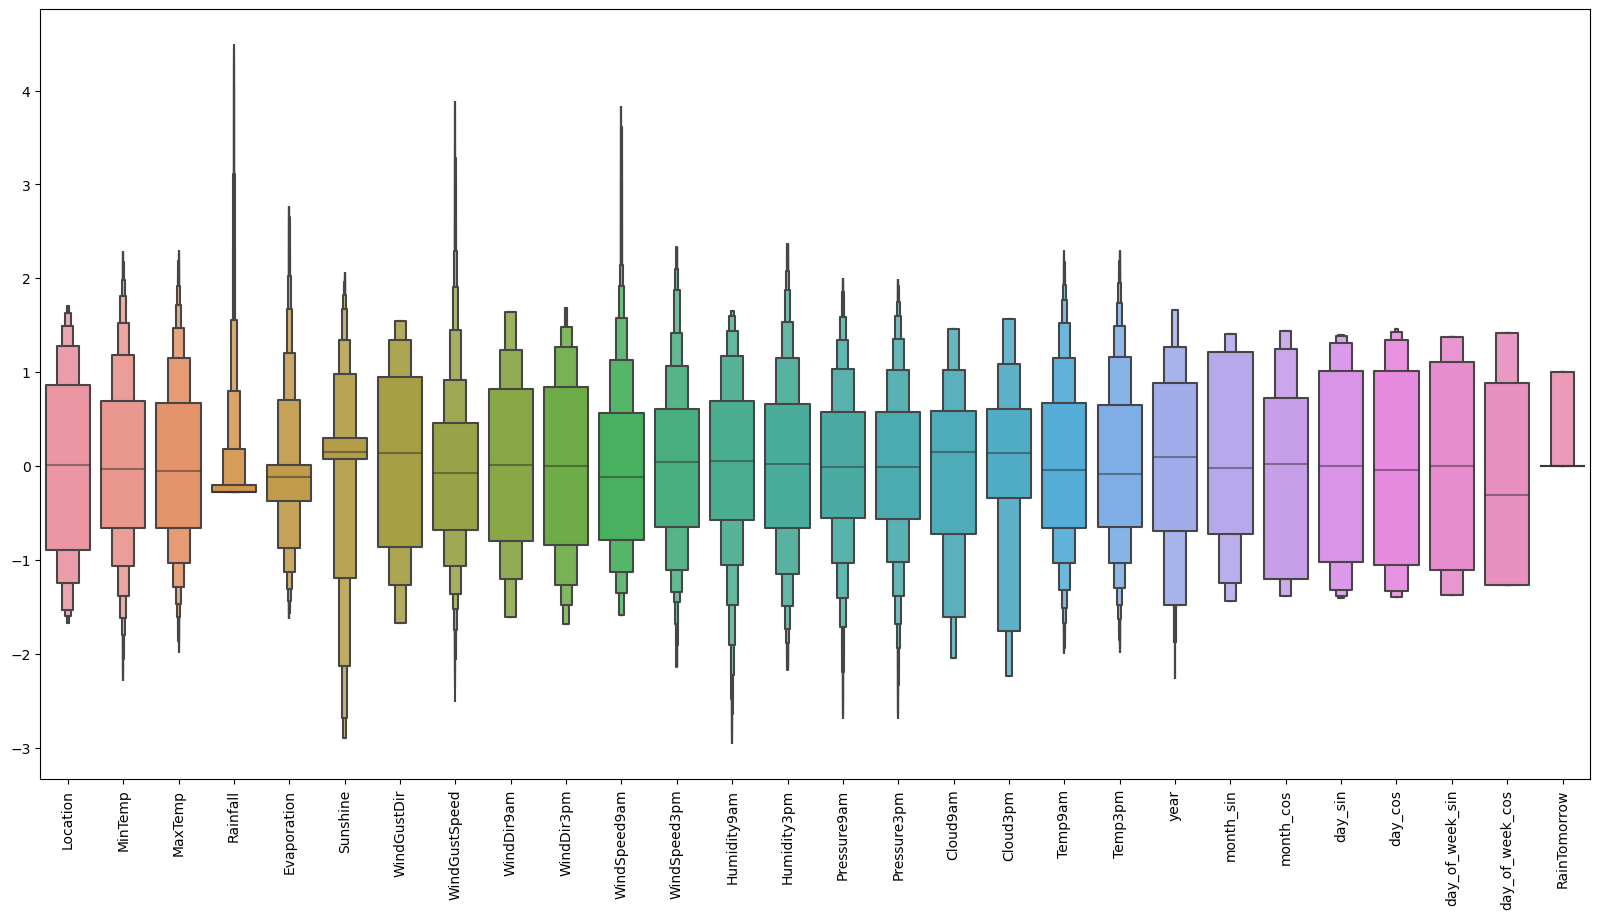

In [53]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

<Axes: >

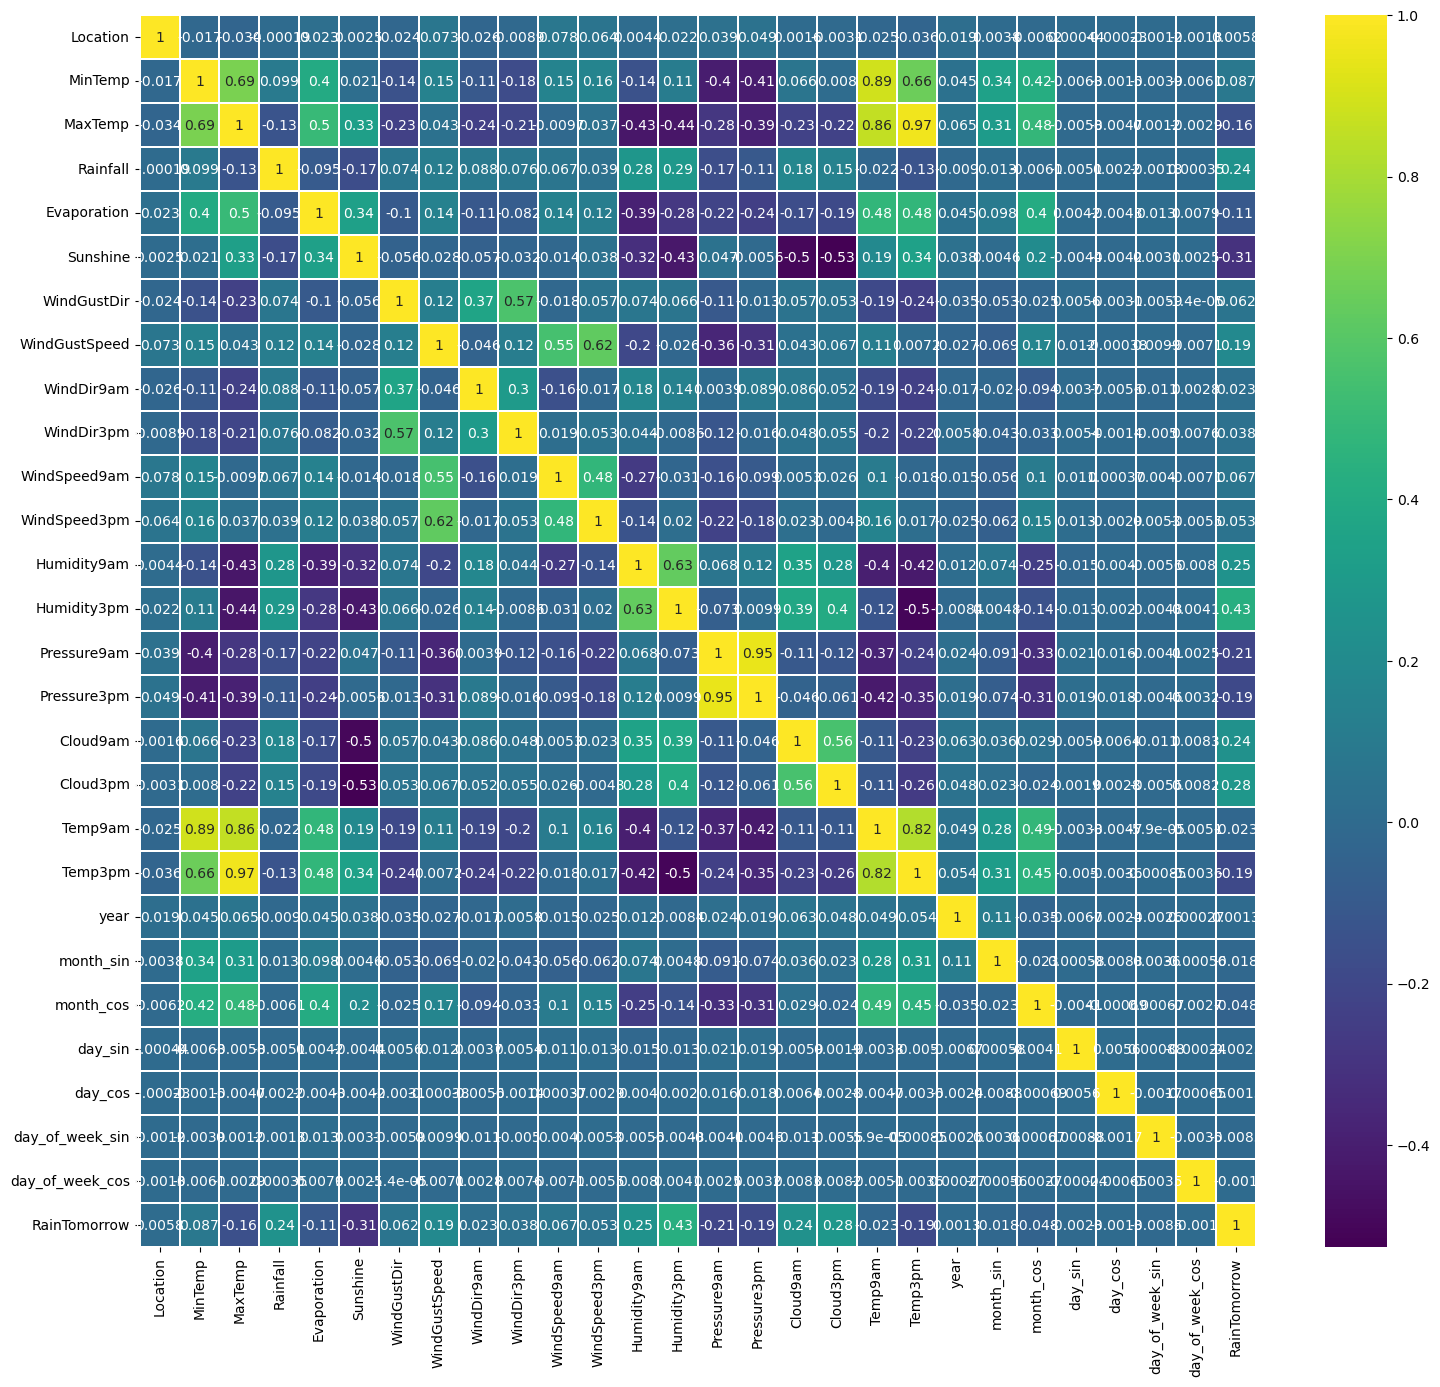

In [54]:
plt.figure(figsize=(18,16))
sns.heatmap(features.corr(),cmap='viridis',annot=True,lw=0.1)

In [60]:
features.drop(['Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

In [61]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 24)

In [62]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train,
                    batch_size = 32, 
                    epochs = 150, 
                    callbacks=[early_stopping],
                    validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 3s 1ms/step - loss: 0.5001 - accuracy: 0.7614 - val_loss: 0.4311 - val_accuracy: 0.7631
Epoch 2/150
2551/2551 [==============================] - 3s 981us/step - loss: 0.4472 - accuracy: 0.7615 - val_loss: 0.4258 - val_accuracy: 0.7631
Epoch 3/150
2551/2551 [==============================] - 3s 998us/step - loss: 0.4426 - accuracy: 0.7656 - val_loss: 0.4228 - val_accuracy: 0.8177
Epoch 4/150
2551/2551 [==============================] - 2s 950us/step - loss: 0.4412 - accuracy: 0.8188 - val_loss: 0.4209 - val_accuracy: 0.8180
Epoch 5/150
2551/2551 [==============================] - 2s 956us/step - loss: 0.4400 - accuracy: 0.8215 - val_loss: 0.4195 - val_accuracy: 0.8203
Epoch 6/150
2551/2551 [==============================] - 3s 980us/step - loss: 0.4380 - accuracy: 0.8225 - val_loss: 0.4183 - val_accuracy: 0.8209
Epoch 7/150
2551/2551 [==============================] - 2s 979us/step - loss: 0.4377 - accuracy: 0.8240 - val_loss: 0.4

2551/2551 [==============================] - 3s 1ms/step - loss: 0.4261 - accuracy: 0.8267 - val_loss: 0.4080 - val_accuracy: 0.8236
Epoch 57/150
2551/2551 [==============================] - 3s 995us/step - loss: 0.4275 - accuracy: 0.8269 - val_loss: 0.4076 - val_accuracy: 0.8239
Epoch 58/150
2551/2551 [==============================] - 2s 968us/step - loss: 0.4258 - accuracy: 0.8274 - val_loss: 0.4083 - val_accuracy: 0.8244
Epoch 59/150
2551/2551 [==============================] - 3s 988us/step - loss: 0.4250 - accuracy: 0.8279 - val_loss: 0.4076 - val_accuracy: 0.8242
Epoch 60/150
2551/2551 [==============================] - 3s 996us/step - loss: 0.4265 - accuracy: 0.8277 - val_loss: 0.4070 - val_accuracy: 0.8243
Epoch 61/150
2551/2551 [==============================] - 2s 973us/step - loss: 0.4251 - accuracy: 0.8280 - val_loss: 0.4072 - val_accuracy: 0.8245
Epoch 62/150
2551/2551 [==============================] - 2s 973us/step - loss: 0.4252 - accuracy: 0.8281 - val_loss: 0.4077 - 

Plotting training and validation loss over epochs

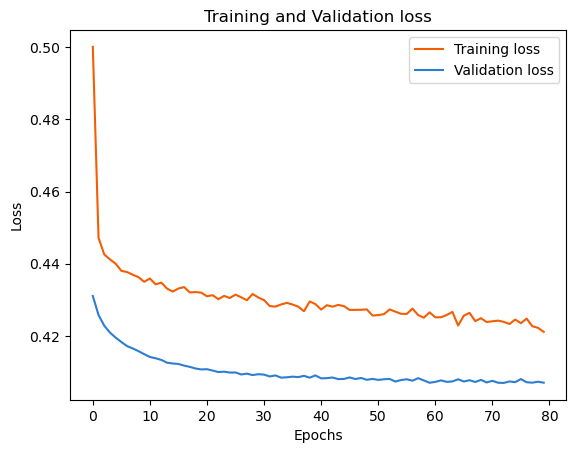

In [63]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], '#f45d01', label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#2d7dd2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

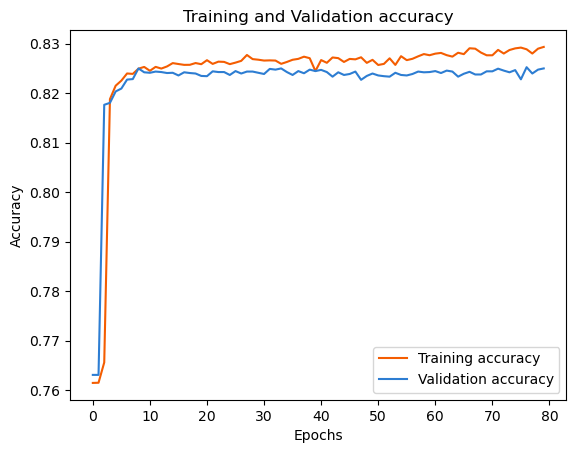

In [64]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#f45d01", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#2d7dd2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 [==============================] - 1s 564us/step


<Axes: >

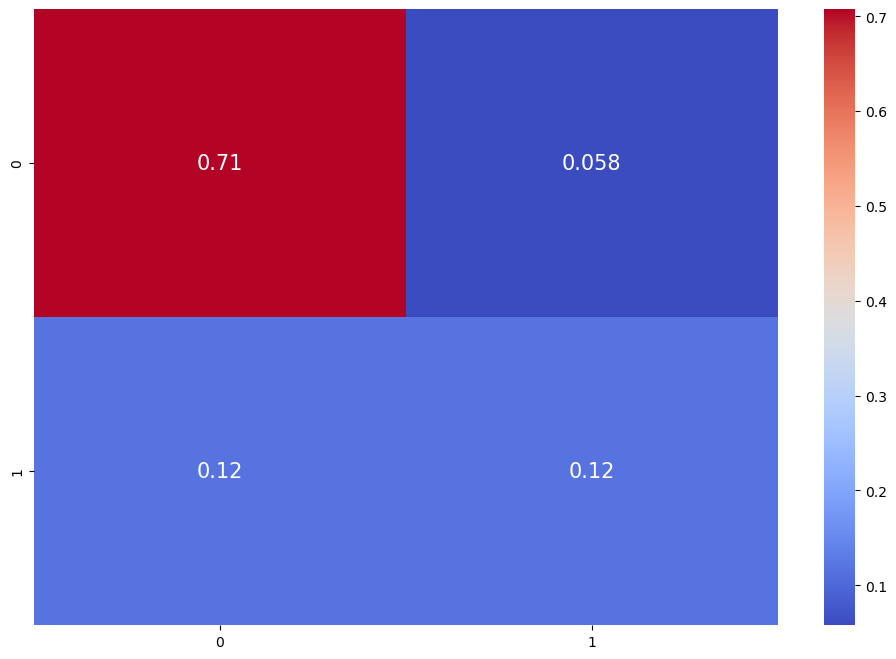

In [66]:

plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = 'coolwarm', annot = True, annot_kws = {'size':15})

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     19522
           1       0.67      0.50      0.58      5986

    accuracy                           0.83     25508
   macro avg       0.77      0.71      0.73     25508
weighted avg       0.81      0.83      0.82     25508



In [68]:
#Train Auc
pred_train = model.predict(X_train)
pred_train = (pred_train>0.5)

roc_auc_score(y_train,pred_train)

3189/3189 [==============================] - 2s 566us/step


0.723085531096699

In [69]:
#Test AUC
roc_auc_score(y_test, y_pred)

0.7143938424366414